# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [39]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []
units = 'metric'

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =  city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | uturoa
Processing Record 5 of Set 1 | bam
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | qionghai
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | st. john's
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | tavda
Processing Record 16 of Set 1 | pechea
Processing Record 17 of Set 1 | barra do corda
Processing Record 18 of Set 1 | kolonia
Processing Record 19 of Set 1 | khanpur mahar
Processing Record 20 of Set 1 | pionerskiy
Processing Record 21 of Set 1 | ancud
Processing Record 22 of Set 1 | qaqortoq
Processing Record 23 

In [44]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [45]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,8.18,89,72,1.75,AU,1690042252
1,guerrero negro,27.9769,-114.0611,21.98,68,9,5.06,MX,1690042231
2,ribeira grande,38.5167,-28.7000,24.32,78,40,2.06,PT,1690042252
3,uturoa,-16.7333,-151.4333,24.11,75,100,6.73,PF,1690042252
4,bam,29.1060,58.3570,35.62,8,41,6.64,IR,1690042252


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("figures/cities_two.csv", index_label="City_ID")



In [48]:
# Read saved data
city_data_df = pd.read_csv("figures/cities_two.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,8.18,89,72,1.75,AU,1690042252
1,guerrero negro,27.9769,-114.0611,21.98,68,9,5.06,MX,1690042231
2,ribeira grande,38.5167,-28.7000,24.32,78,40,2.06,PT,1690042252
3,uturoa,-16.7333,-151.4333,24.11,75,100,6.73,PF,1690042252
4,bam,29.1060,58.3570,35.62,8,41,6.64,IR,1690042252


In [53]:
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,8.18,89,72,1.75,AU,2023-07-22 16:10:52
1,guerrero negro,27.9769,-114.0611,21.98,68,9,5.06,MX,2023-07-22 16:10:31
2,ribeira grande,38.5167,-28.7000,24.32,78,40,2.06,PT,2023-07-22 16:10:52
3,uturoa,-16.7333,-151.4333,24.11,75,100,6.73,PF,2023-07-22 16:10:52
4,bam,29.1060,58.3570,35.62,8,41,6.64,IR,2023-07-22 16:10:52


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

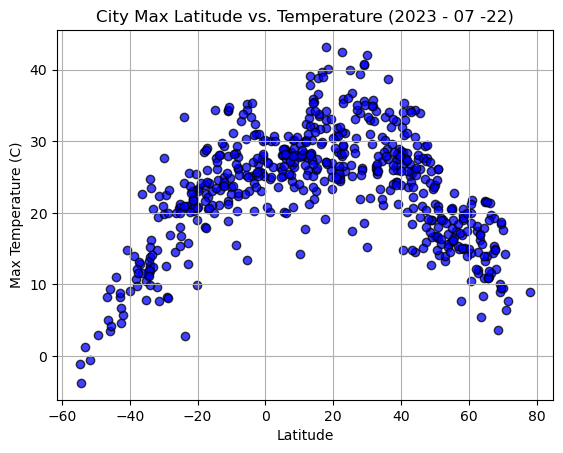

In [59]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_axis = city_data_df['Lat']

y_axis = city_data_df['Max Temp']
# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2023 - 07 -22)')

plt.scatter(x_axis, y_axis, marker = 'o', facecolors = 'blue', edgecolors = 'black', alpha =0.75)

# Save the figure
plt.savefig("figures/Fig1.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Humidity

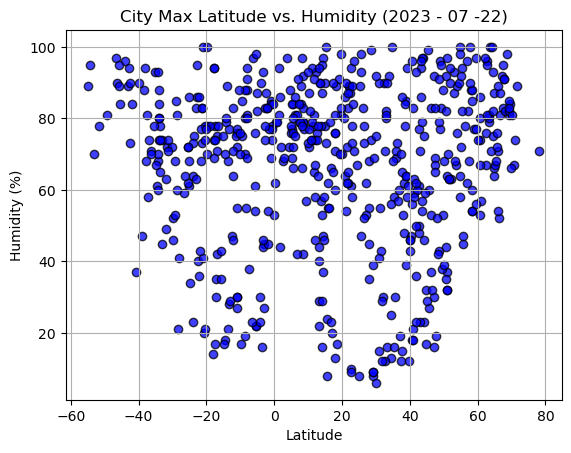

In [61]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

x_axis = city_data_df['Lat']

y_axis = city_data_df['Humidity']

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitude vs. Humidity (2023 - 07 -22)')

plt.scatter(x_axis, y_axis, marker = 'o', facecolors = 'blue', edgecolors = 'black', alpha =0.75)
# Save the figure
plt.savefig("figures/Fig2.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Cloudiness

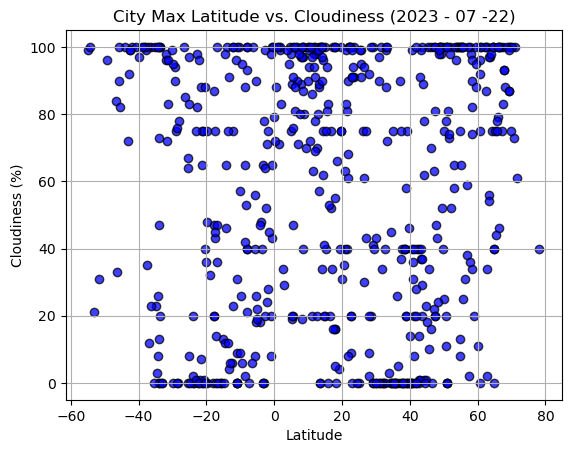

In [63]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

x_axis = city_data_df['Lat']

y_axis = city_data_df['Cloudiness']

# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness (2023 - 07 -22)')

plt.scatter(x_axis, y_axis, marker = 'o', facecolors = 'blue', edgecolors = 'black', alpha =0.75)
# Save the figure
plt.savefig("figures/Fig3.png")

# Show plot
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

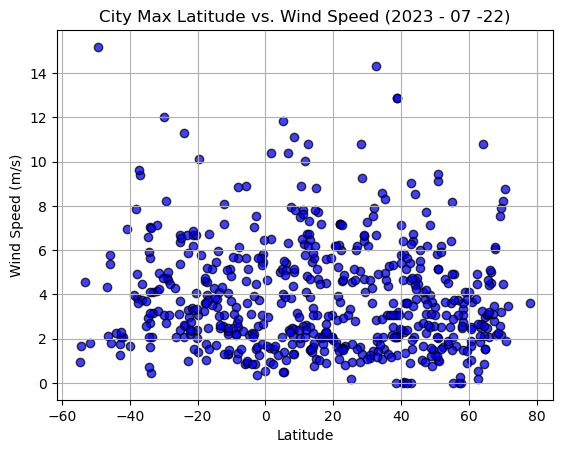

In [65]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

x_axis = city_data_df['Lat']

y_axis = city_data_df['Wind Speed']

# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed (2023 - 07 -22)')

plt.scatter(x_axis, y_axis, marker = 'o', facecolors = 'blue', edgecolors = 'black', alpha =0.75)

# Save the figure
plt.savefig("figures/Fig4.png")

# Show plot
plt.grid()
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [75]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def regress(x,y,x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker = 'o', facecolors = 'blue', edgecolors = 'black', alpha =0.75)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(min(x),min(y)),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']) >= 0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,guerrero negro,27.9769,-114.0611,21.98,68,9,5.06,MX,2023-07-22 16:10:31
2,ribeira grande,38.5167,-28.7000,24.32,78,40,2.06,PT,2023-07-22 16:10:52
4,bam,29.1060,58.3570,35.62,8,41,6.64,IR,2023-07-22 16:10:52
6,qionghai,19.2425,110.4642,26.03,91,4,2.04,CN,2023-07-22 16:10:52
8,iqaluit,63.7506,-68.5145,5.39,100,97,2.68,CA,2023-07-22 16:10:53


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']) < 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,8.18,89,72,1.75,AU,2023-07-22 16:10:52
3,uturoa,-16.7333,-151.4333,24.11,75,100,6.73,PF,2023-07-22 16:10:52
5,port-aux-francais,-49.3500,70.2167,2.97,81,96,15.18,TF,2023-07-22 16:10:52
7,adamstown,-25.0660,-130.1015,20.87,61,97,6.70,PN,2023-07-22 16:10:53
12,west island,-12.1568,96.8225,24.99,83,100,7.20,CC,2023-07-22 16:10:53


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.414258182773914


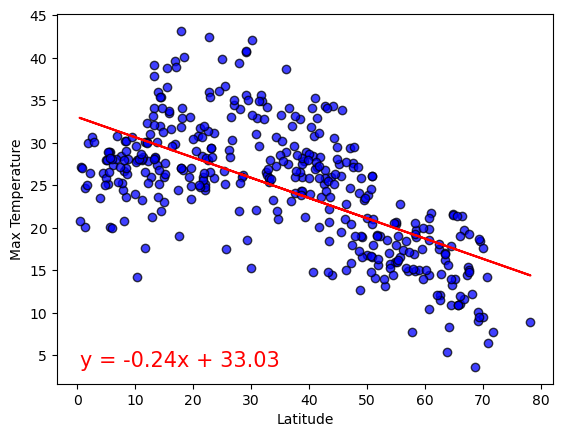

In [78]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df['Lat']
y= northern_hemi_df['Max Temp']
regress(x,y, 'Latitude', 'Max Temperature')

The r-squared is: 0.6732357760665859


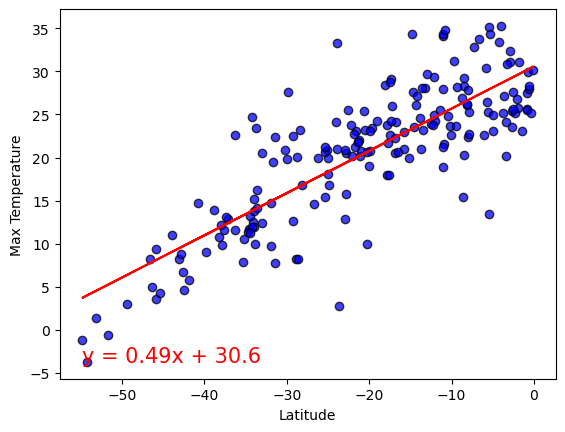

In [79]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df['Lat']
y= southern_hemi_df['Max Temp']
regress(x,y, 'Latitude', 'Max Temperature')

**Discussion about the linear relationship:** 

First, it makes sense that the max temp would increase as the latitude went from negative to 0 as this means we are going up closer to the equater (Southern Hemisphere), and vise versa as we go from 0 up (Northern Hemisphere).

The R value indiicates that there is a slightly stronger relationship between the temp and Latitude in the Southern Hemisphere than in the Northern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0025023057626605426


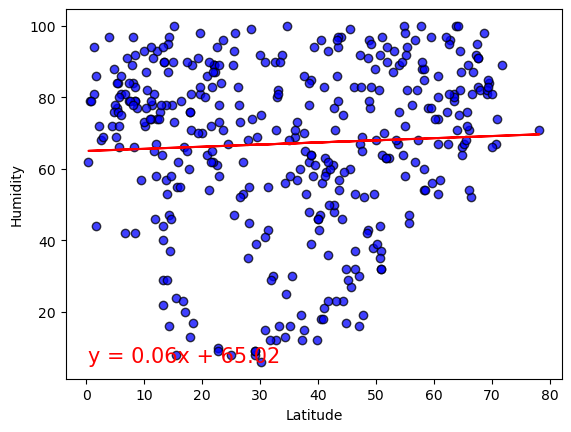

In [81]:
# Northern Hemisphere
# YOUR CODE HERE

x = northern_hemi_df['Lat']
y= northern_hemi_df['Humidity']
regress(x,y, 'Latitude', 'Humidity')

The r-squared is: 0.05162314559379633


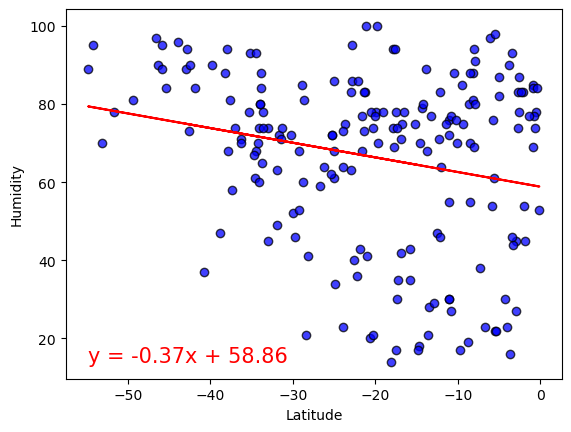

In [83]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df['Lat']
y= southern_hemi_df['Humidity']
regress(x,y, 'Latitude', 'Humidity')

**Discussion about the linear relationship:** 

The r-squared value for both Hemispheres shows a lack of relationship between Latitude and Humidity, though the Southern Hemisphere does have an ever so slightly high r-squared value. But boht are pretty close to 0.

This is slightly surprising as you would expect it to be humid in the tropical zone then have a pretty big fall off as it went out of the tropics for both hemispheres.

This though could be abnormalities in the environment that day/ in general- factors of global climate change possibly.
Also, different environments/landscapes such as deserts could weaken the relationship between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0011890616861867744


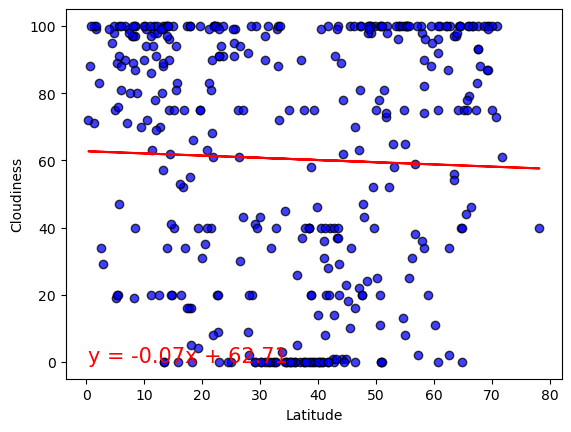

In [84]:
# Northern Hemisphere
# YOUR CODE HERE

x = northern_hemi_df['Lat']
y= northern_hemi_df['Cloudiness']
regress(x,y, 'Latitude', 'Cloudiness')

The r-squared is: 0.0495460117425088


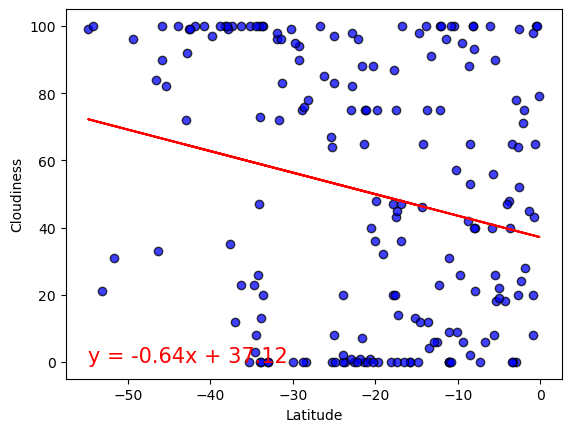

In [85]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df['Lat']
y= southern_hemi_df['Cloudiness']
regress(x,y, 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** 

Again a low r-squared value for both hemispheres showing that latitude is probably not the best factor when trying to predict cloudiness.

Perhaps things like:

- elevation
- proximity to large bodies of water

would be better factors to predict/track cloudiness with.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.010466276577619432


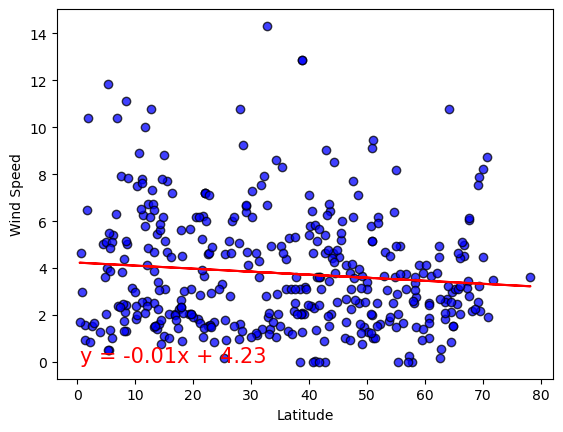

In [86]:
# Northern Hemisphere
# YOUR CODE HERE

x = northern_hemi_df['Lat']
y= northern_hemi_df['Wind Speed']
regress(x,y, 'Latitude', 'Wind Speed')

The r-squared is: 0.014479107892271513


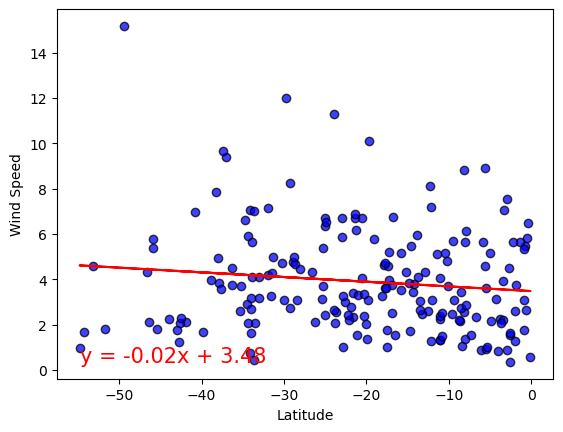

In [87]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df['Lat']
y= southern_hemi_df['Wind Speed']
regress(x,y, 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:**

Again the low r-squared value for both hemispheres shows a weak correlation between latitudes and wind speed.

I imagine (again) elevation and proximity to large bodies of water would be better factors when predicting wind speed of a city. 